<a href="https://colab.research.google.com/github/JoseDelVallee/ENIGH-Project/blob/main/Copia_de_PROYECTO_MP_(2DA_ENTREGA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Modelado Predictivo


---


## Objetivo de Desarrollo Sostenible No.8 Trabajo Decente y Crecimiento Económico

---



#Integrantes:


*   Arias Morales Yahir
*   Ayala García Oscar Galo
*   Piña del Valle José
*   Rivera García Axel Maximiliano

### Montar drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importación de librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
concentrado = pd.read_csv('/content/drive/MyDrive/concentradohogar.csv')

df = concentrado[["ingtrab", "trabajo", "sueldos", "gasto_mon", "erogac_tot", "ubica_geo", "est_socio", "tam_loc", "educa_jefe"]]

In [ ]:
le = LabelEncoder()
df['ubica_geo'] = le.fit_transform(df['ubica_geo']) + 1
df['est_socio'] = le.fit_transform(df['est_socio']) + 1
df['tam_loc'] = le.fit_transform(df['tam_loc']) + 1
df['educa_jefe'] = le.fit_transform(df['educa_jefe']) + 1

df.head()

,ingtrab,trabajo,sueldos,gasto_mon,erogac_tot,ubica_geo,est_socio,tam_loc,educa_jefe
0,35706.51,35706.51,33749.99,35091.17,0.00,1,4,1,3
1,66766.28,66766.28,61630.42,78670.73,19565.21,1,4,1,8
2,93081.50,51603.24,41086.95,101647.27,0.00,1,4,1,10
3,0.00,0.00,0.00,46702.31,28124.99,1,3,1,11
4,22255.43,17364.13,17364.13,26927.85,0.00,1,3,1,8


### **Limpieza de los datos**

Datos vacios o nulos

In [ ]:
df.isnull().sum()

,0
ingtrab,0
trabajo,0
sueldos,0
gasto_mon,0
erogac_tot,0
ubica_geo,0
est_socio,0
tam_loc,0
educa_jefe,0


In [ ]:
num_ceros = (df == 0).sum()
print(num_ceros)

ingtrab       10749
trabajo       22468
sueldos       23210
gasto_mon        69
erogac_tot    40860
ubica_geo         0
est_socio         0
tam_loc           0
educa_jefe        0
dtype: int64


In [ ]:
#Eliminar las filas que tengan 0 en ingtrab
df = df[df['ingtrab'] != 0]

In [ ]:
num_ceros = (df == 0).sum()
print(num_ceros)

ingtrab           0
trabajo       11719
sueldos       12461
gasto_mon        10
erogac_tot    34750
ubica_geo         0
est_socio         0
tam_loc           0
educa_jefe        0
dtype: int64


In [ ]:
num_zeros_por_fila = (df == 0).sum(axis=1)

filas_menos_de_ceros = (num_zeros_por_fila < 2).sum()
print(f"Número de filas con menos de 0: {filas_menos_de_ceros}")

Número de filas con menos de 0: 67295


In [ ]:
#Clases de las variables categoricas
df_categoricas = df[["ubica_geo", "est_socio", "tam_loc", "educa_jefe"]]

#Ubica geo
df_categoricas['ubica_geo'].value_counts()

,count
ubica_geo,
1,1341
14,1256
12,1231
152,1185
775,1169
...,...
968,4
630,4
1016,3


In [ ]:
#est_socio
df_categoricas['est_socio'].value_counts()

,count
est_socio,
2,42010
1,18972
3,13363
4,5008


In [ ]:
#tam_loc
df_categoricas['tam_loc'].value_counts()

,count
tam_loc,
4,30031
1,28883
3,10288
2,10151


In [ ]:
#educa_jefe
df_categoricas['educa_jefe'].value_counts()

,count
educa_jefe,
6,22490
4,12896
8,10879
3,10866
10,8733
1,4296
7,2808
5,2466
9,2344


### Visualizacion de outliers

In [ ]:
df_numericas = df[["ingtrab", "trabajo", "sueldos", "gasto_mon", "erogac_tot"]]

#Sumar 1 a todas las variables numericas
for col in df_numericas.columns:
    df_numericas[col] = df_numericas[col] + 1

#Transformacion a BoxCox
for col in df_numericas.columns:
    df_numericas[col], _ = stats.boxcox(df_numericas[col])

df_categoricas = df[["ubica_geo", "est_socio", "tam_loc", "educa_jefe"]]

df = pd.concat([df_numericas, df_categoricas], axis=1)
df

,ingtrab,trabajo,sueldos,gasto_mon,erogac_tot,ubica_geo,est_socio,tam_loc,educa_jefe
0,68.840934,86.195709,84.906917,19.477257,0.000000,1,4,1,3
1,83.246717,105.985386,103.628767,22.104596,10.563111,1,4,1,8
2,92.027736,97.357673,90.630342,22.987790,0.000000,1,4,1,10
4,59.569395,67.806396,68.032695,18.664479,0.000000,1,3,1,8
5,71.402094,89.687015,87.211732,20.676584,9.181574,1,3,1,8
...,...,...,...,...,...,...,...,...,...
90097,63.761598,77.406508,77.677892,19.605076,8.288076,1122,2,4,6
90098,52.606578,43.253791,43.374293,16.882330,0.000000,1122,2,4,5
90099,62.782328,77.987282,78.261450,17.583138,0.000000,1122,2,4,4
90100,103.301239,0.000000,0.000000,23.496971,11.821043,1122,2,4,6


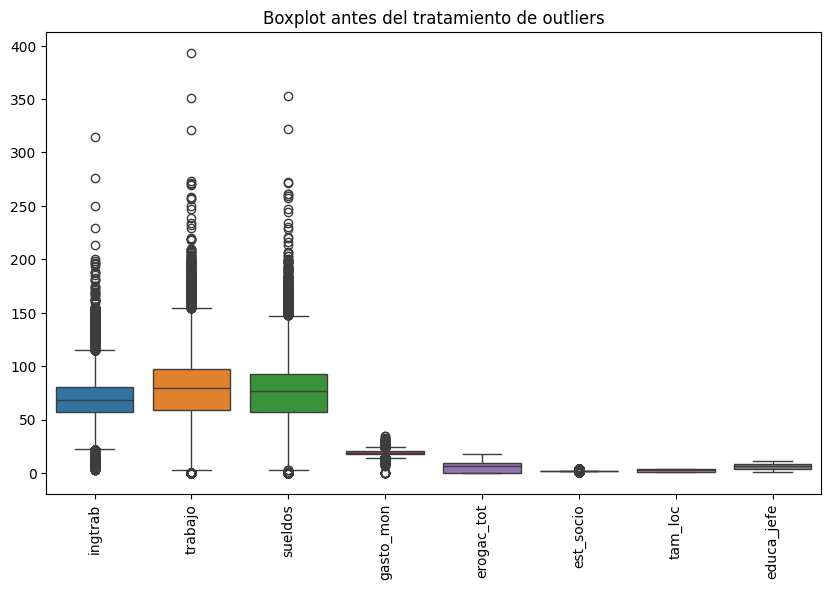

In [ ]:
df_sin_ubica_geo = df.drop(columns=['ubica_geo'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sin_ubica_geo)
plt.xticks(rotation=90)
plt.title("Boxplot antes del tratamiento de outliers")
plt.show()

In [ ]:
z_scores = np.abs((df - df.mean()) / df.std())
outliers = df[(z_scores > 3).any(axis=1)]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

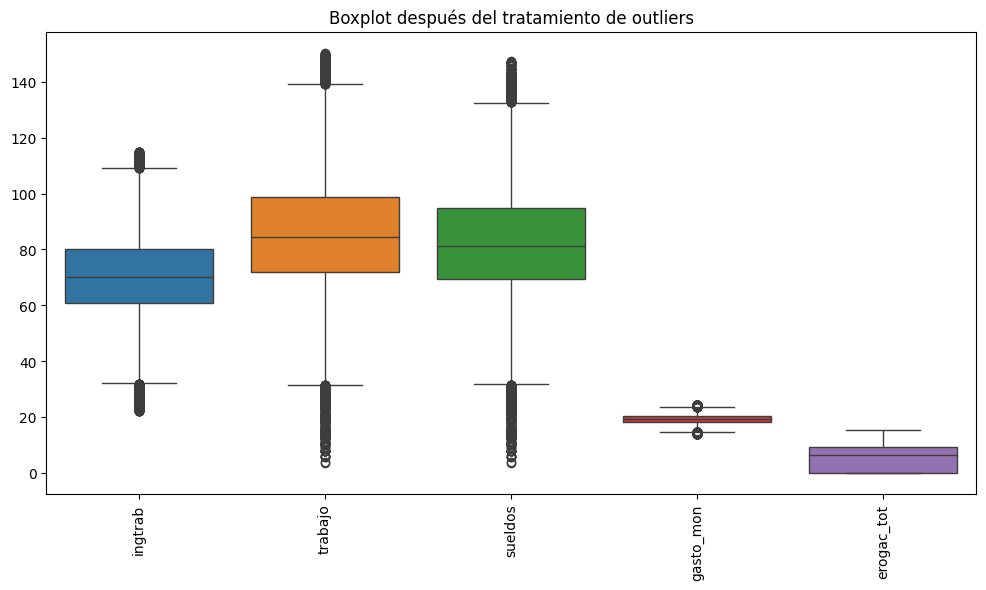

In [ ]:
#Boxplots
df_numericos = df[["ingtrab", "trabajo", "sueldos", "gasto_mon", "erogac_tot"]]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numericos)
plt.xticks(rotation=90)
plt.title("Boxplot después del tratamiento de outliers")
plt.show()

In [ ]:
df

,ingtrab,trabajo,sueldos,gasto_mon,erogac_tot,ubica_geo,est_socio,tam_loc,educa_jefe
17,30.125304,35.256446,35.346255,14.560706,9.413168,1,2,1,3
18,70.052265,87.845431,83.239497,19.591195,0.000000,1,2,1,8
19,69.551172,87.162652,86.114844,20.969153,8.996009,1,2,1,10
26,79.328285,99.355615,87.826055,19.932135,8.361855,1,2,1,9
27,67.618123,84.533189,79.589591,20.746495,0.000000,1,2,1,6
...,...,...,...,...,...,...,...,...,...
90095,58.558023,61.195230,61.391584,22.336961,11.586144,1122,2,4,10
90096,71.573477,89.193783,86.270702,20.048571,8.229453,1122,2,4,11
90097,63.761598,77.406508,77.677892,19.605076,8.288076,1122,2,4,6
90098,52.606578,43.253791,43.374293,16.882330,0.000000,1122,2,4,5


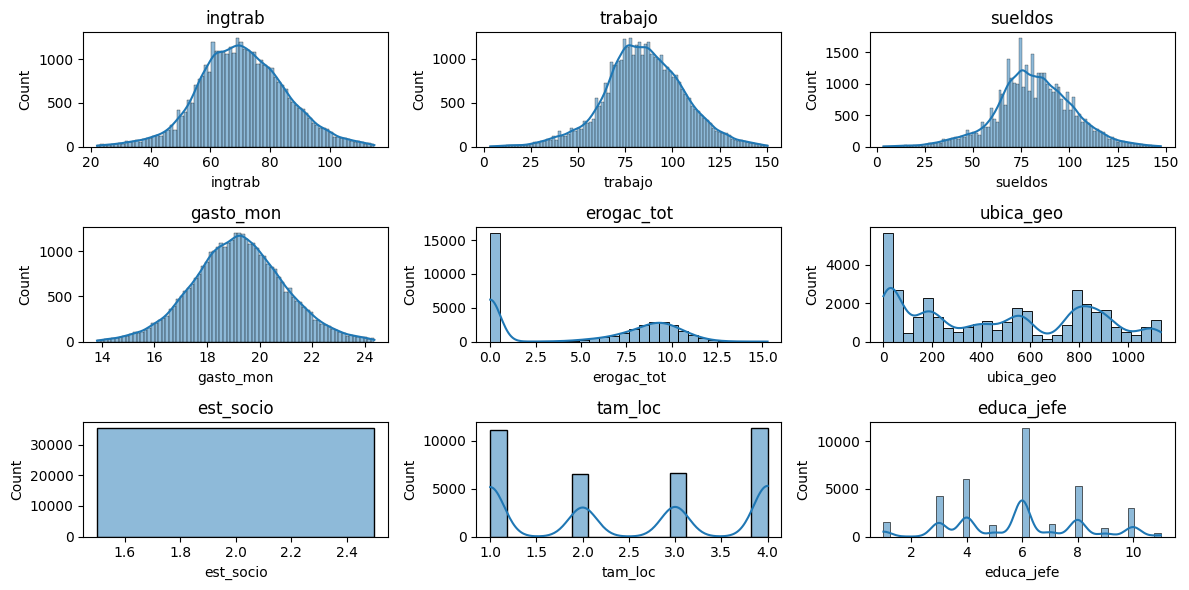

In [ ]:
#Distribucion de cada variable
plt.figure(figsize=(12, 6))

num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3
for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

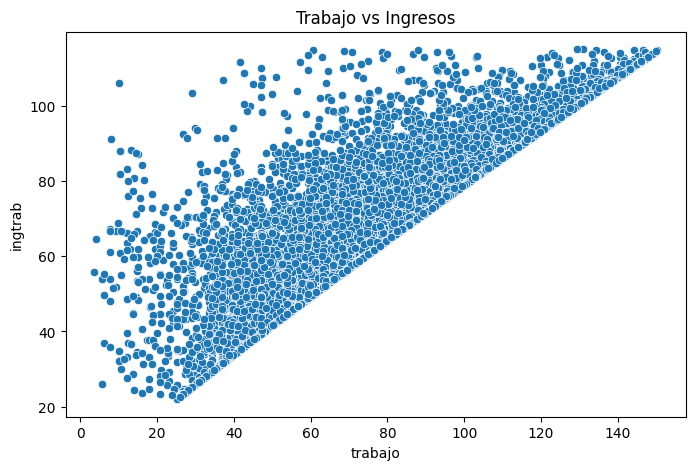

In [ ]:
#Trabajo vs ingtrab
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='trabajo', y='ingtrab')
plt.title("Trabajo vs Ingresos")
plt.show()

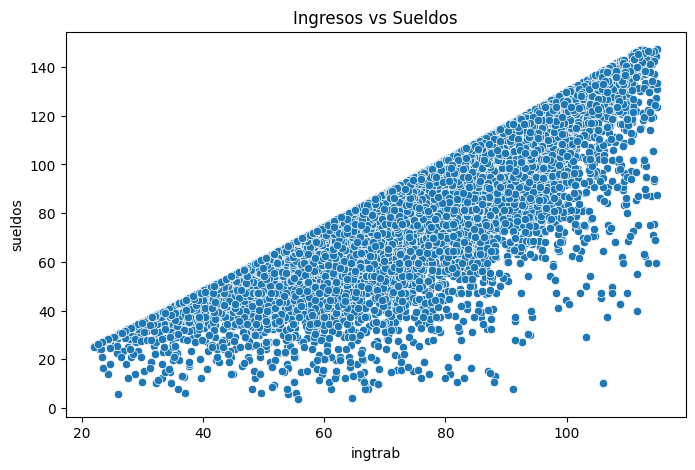

In [ ]:
#ingtrab vs sueldos
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='ingtrab', y='sueldos')
plt.title("Ingresos vs Sueldos")
plt.show()

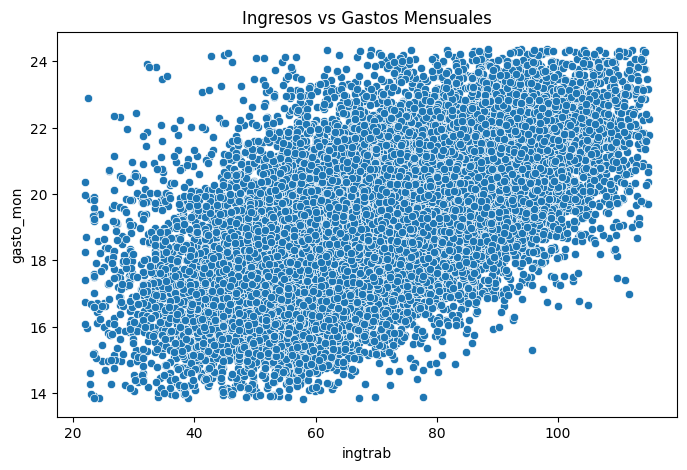

In [ ]:
#ingtrab vs gasto_mon
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='ingtrab', y='gasto_mon')
plt.title("Ingresos vs Gastos Mensuales")
plt.show()

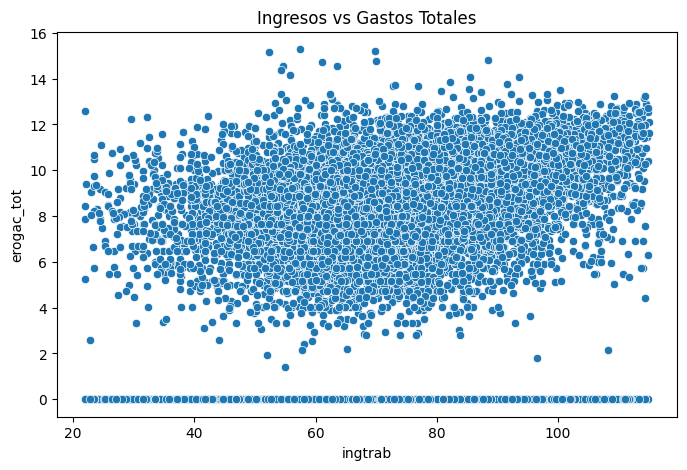

In [ ]:
#ingtrab vs eroga_tot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='ingtrab', y='erogac_tot')
plt.title("Ingresos vs Gastos Totales")
plt.show()

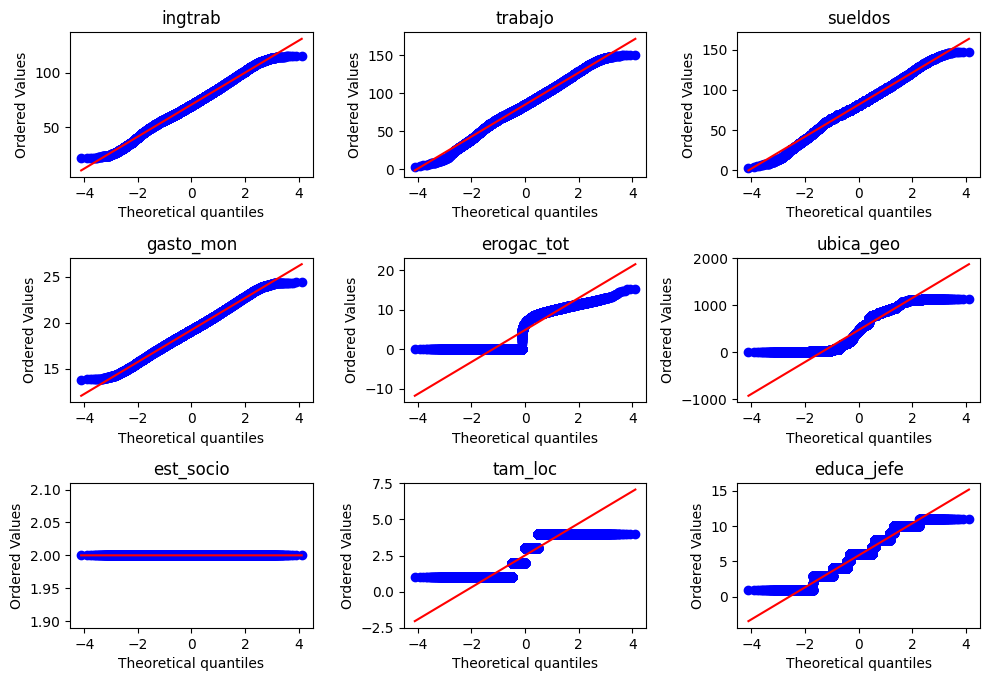

In [ ]:
#Q-Q plots
plt.figure(figsize=(10, 20))
for i, col in enumerate(df.columns):
    plt.subplot(num_cols, 3, i+1)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)
plt.tight_layout()

In [ ]:
#Matriz de covarianzas
df.cov()

,ingtrab,trabajo,sueldos,gasto_mon,erogac_tot,ubica_geo,est_socio,tam_loc,educa_jefe
ingtrab,214.264556,274.753104,247.665417,15.253206,20.787975,-488.010061,0.0,-1.446468,7.748102
trabajo,274.753104,444.348367,403.350245,19.449205,24.527887,-780.175449,0.0,-2.551603,11.533802
sueldos,247.665417,403.350245,396.254547,17.823834,21.103339,-711.449635,0.0,-1.991910,9.713175
gasto_mon,15.253206,19.449205,17.823834,3.018094,2.108136,-14.004329,0.0,-0.151899,1.111480
erogac_tot,20.787975,24.527887,21.103339,2.108136,21.113396,54.883097,0.0,-0.330798,1.360802
ubica_geo,-488.010061,-780.175449,-711.449635,-14.004329,54.883097,126994.235723,0.0,-12.765355,19.384493
est_socio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
tam_loc,-1.446468,-2.551603,-1.991910,-0.151899,-0.330798,-12.765355,0.0,1.510785,-0.358964
educa_jefe,7.748102,11.533802,9.713175,1.111480,1.360802,19.384493,0.0,-0.358964,5.394943


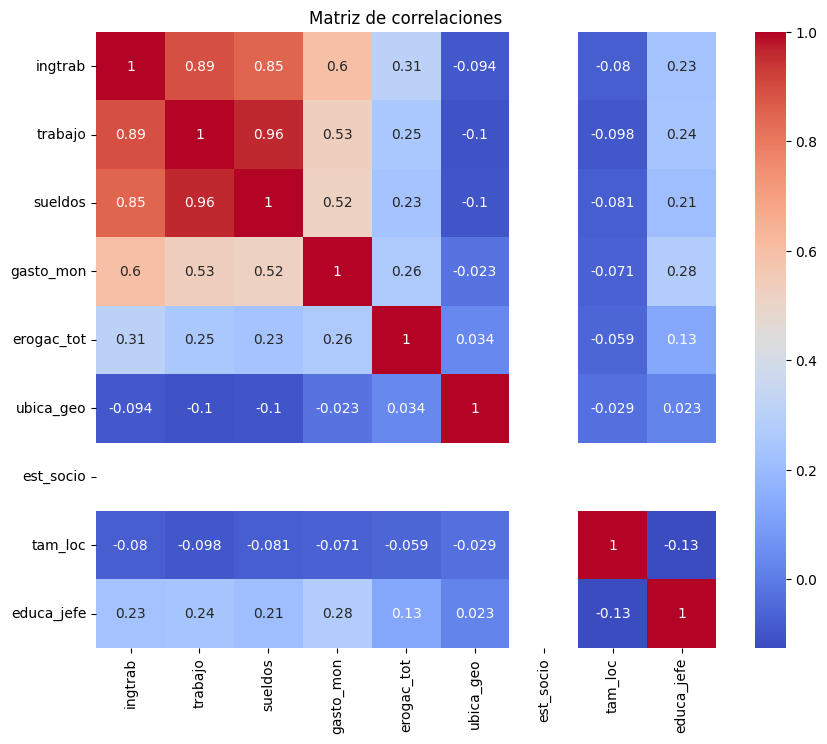

In [ ]:
#Correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlaciones")
plt.show()

# Modelado

### Regresion lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df.drop(columns=['ingtrab'])
y = df['ingtrab']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Coeficientes del modelo
print(modelo.coef_)
print(modelo.intercept_)

[ 6.01129569e-01 -6.40804022e-02  1.45075027e+00  2.16457646e-01
 -3.79167064e-04  1.11022302e-15  1.39610212e-01 -8.28590155e-02]
-3.685467847423851


In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
#Metricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 36.091292268122174
R2: 0.8307785697428957


In [ ]:
from scipy.stats import pearsonr

pearson_corr, _ = pearsonr(y_test, y_pred)
print('Pearson Correlation:', pearson_corr)

Pearson Correlation: 0.9116260890532984


In [ ]:
#p values
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

p_values = model.pvalues
print(p_values)

trabajo        0.000000e+00
sueldos        4.652324e-24
gasto_mon      0.000000e+00
erogac_tot    9.992561e-174
ubica_geo      2.185998e-05
est_socio      3.871400e-19
tam_loc        6.250876e-08
educa_jefe     3.937566e-07
dtype: float64


### Regresion polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X = df.drop(columns=['ingtrab'])
y = df['ingtrab']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
modelo.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
#Metricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 33.2562002565081
R2: 0.844071480441457


### Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['ubica_geo', 'est_socio', 'tam_loc', 'educa_jefe'])
y = df['educa_jefe']

print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
classifier = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', C=1.0)
classifier.fit(X_train, y_train)

Index(['ingtrab', 'trabajo', 'sueldos', 'gasto_mon', 'erogac_tot'], dtype='object')


LogisticRegression(multi_class='multinomial', random_state=42)

In [ ]:
print(classifier.coef_)
print("---------------------------------------------------------------------------")
print(classifier.intercept_)

[[ 0.00916948 -0.04253691  0.0337543   0.02529995 -0.02218145]
 [-0.02506329 -0.02580467 -0.02492929 -0.01036279 -0.00179943]
 [ 0.01314963 -0.03387981  0.02163605  0.07430262 -0.0140908 ]
 [ 0.01954237 -0.03654114  0.02811002  0.05975474 -0.0312357 ]
 [ 0.02229322 -0.01604809  0.00420579 -0.02407883 -0.02153646]
 [ 0.01301088 -0.00116672 -0.00325536  0.08869572 -0.01569126]
 [ 0.00913736  0.02039849 -0.02049136 -0.03011101 -0.00335202]
 [ 0.00789574  0.02795925 -0.02653674  0.03583521  0.00024205]
 [-0.00764935  0.04369472 -0.03136868 -0.05328109  0.02420654]
 [-0.00286171  0.02721419 -0.00079366 -0.07150854  0.0387267 ]
 [-0.05862433  0.03671069  0.01966892 -0.09454599  0.04671183]]
---------------------------------------------------------------------------
[ 0.00492423 -0.00058134  0.01225259  0.00949504 -0.00145011  0.01356556
 -0.00363454 -0.00343619 -0.00624605 -0.01623981 -0.00864939]


In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0    0    0    0    0  142    0    1    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0  426    0    3    0    0    0]
 [   0    0    0    0    0  589    0    1    0    0    0]
 [   0    0    0    0    0  126    0    0    0    0    0]
 [   0    0    0    0    0 1153    0   12    0    1    0]
 [   0    0    0    0    0  146    0    1    0    0    0]
 [   0    0    0    0    0  505    0    4    0    1    0]
 [   0    0    0    0    0  100    0    0    0    0    0]
 [   0    0    0    0    0  307    0    1    0    0    0]
 [   0    0    0    0    0   35    0    1    0    1    0]]


In [ ]:
accuracy_score(y_test, y_pred)

0.32527410739387125

### SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns="ingtrab")
y = df['ingtrab']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo = SVR(kernel='rbf')
modelo.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
#Metricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 47.6649407467612
R2: 0.7765131437698247
